In [1]:
import numpy as np
from sklearn.datasets import load_iris
#from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle


In [2]:
def calculate_uncertainty_LeastConfident(X, model):
    # Get predicted probabilities for each class
    predicted_probs = model.predict_proba(X)    
    # Calculate uncertainty scores as the least confident probability
    least_confident = 1 - np.max(predicted_probs, axis=1)    
    return least_confident

def calculate_uncertainty_SmallestMargin(X, model):
    # Get predicted probabilities for each class
    predicted_probs = model.predict_proba(X)    
    # Sort the predicted probabilities in descending order
    sorted_probs = np.sort(predicted_probs, axis=1)[:, ::-1]    
    # Calculate uncertainty scores as the difference between the top two probabilities
    smallest_margin = sorted_probs[:, 0] - sorted_probs[:, 1]    
    return smallest_margin

def calculate_uncertainty_Entropy(X, model):
    # Get predicted probabilities for each class
    predicted_probs = model.predict_proba(X)    
    # Check for zero probabilities and replace them with a small value
    predicted_probs[predicted_probs == 0] = 1e-10
    # Calculate uncertainty scores using the entropy
    entropy = -np.sum(predicted_probs * np.log2(predicted_probs), axis=1)
    # Handle the case of uniform probabilities
    entropy[np.isnan(entropy)] = 0    
    return entropy

In [3]:
def select_uncertain_samples_LC(X, model, n_samples=1):
    uncertainty_scores=calculate_uncertainty_LeastConfident(X, model)   
    # Select the indices of the most uncertain samples
    uncertain_indices = np.argsort(uncertainty_scores)[-n_samples:]    
    return uncertain_indices

def select_uncertain_samples_SM(X, model, n_samples=1):
    uncertainty_scores=calculate_uncertainty_SmallestMargin(X, model)   
    # Select the indices of the most uncertain samples
    #uncertain_indices = np.argsort(uncertainty_scores)[:n_samples]    
    uncertain_indices = np.argsort(uncertainty_scores)[::-1][-n_samples:]
    #np.where(uncertainty_scores == np.min(uncertainty_scores))    
    return uncertain_indices

def select_uncertain_samples_Entropy(X, model, n_samples=1):
    uncertainty_scores=calculate_uncertainty_Entropy(X, model_Entropy)   
    # Select the indices of the most uncertain samples
    uncertain_indices = np.argsort(uncertainty_scores)[-n_samples:]    
    np.where(uncertainty_scores == np.max(uncertainty_scores)) 
    return uncertain_indices

In [4]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data[:, :2], iris.target

# Filter the dataset for two classes (class 0 and class 1)
class_indices = np.where((y == 0) | (y == 1))[0]
X = X[class_indices]
y = y[class_indices]
X, y = shuffle(X, y, random_state=42)

In [5]:
model_Entropy = LogisticRegression()
model_LC = LogisticRegression()
model_SM = LogisticRegression()
# Select initial labeled samples randomly
labeled_indices = np.random.choice(X.shape[0], size=5, replace=False) # initial five labeled points
unlabeled_indices = np.setdiff1d(np.arange(X.shape[0]), labeled_indices)

labeled_indices_Entropy=labeled_indices
labeled_indices_LC=labeled_indices
labeled_indices_SM=labeled_indices

unlabeled_indices_Entropy=unlabeled_indices
unlabeled_indices_LC=unlabeled_indices
unlabeled_indices_SM=unlabeled_indices
# Start the active learning loop
n_iterations = 5
n_samples_per_iteration = 1

C:\Users\engal\AppData\Local\Temp\ipykernel_25552\1685212231.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=4)  # Adjusted padding value


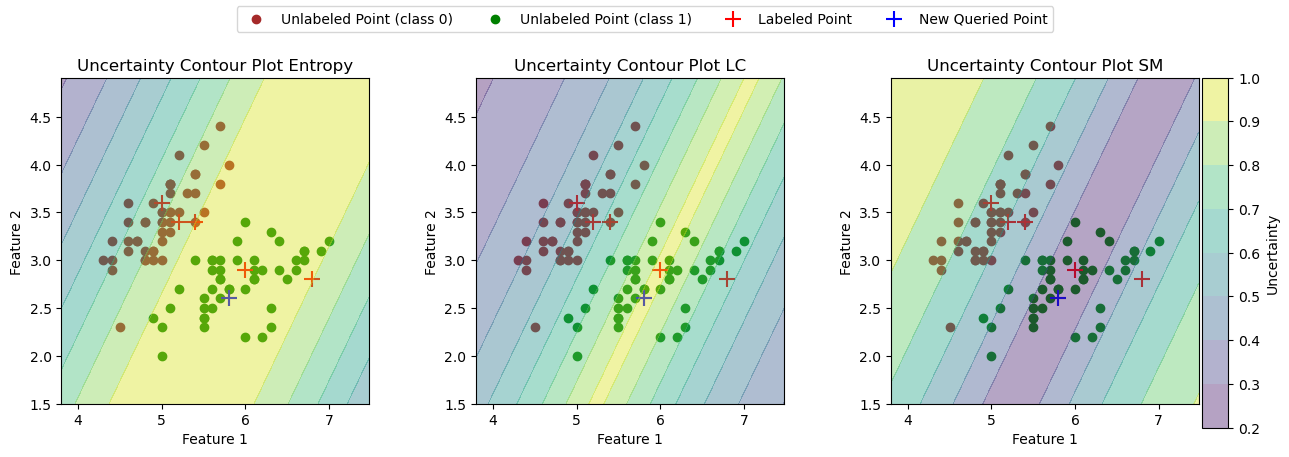

C:\Users\engal\AppData\Local\Temp\ipykernel_25552\1685212231.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=4)  # Adjusted padding value


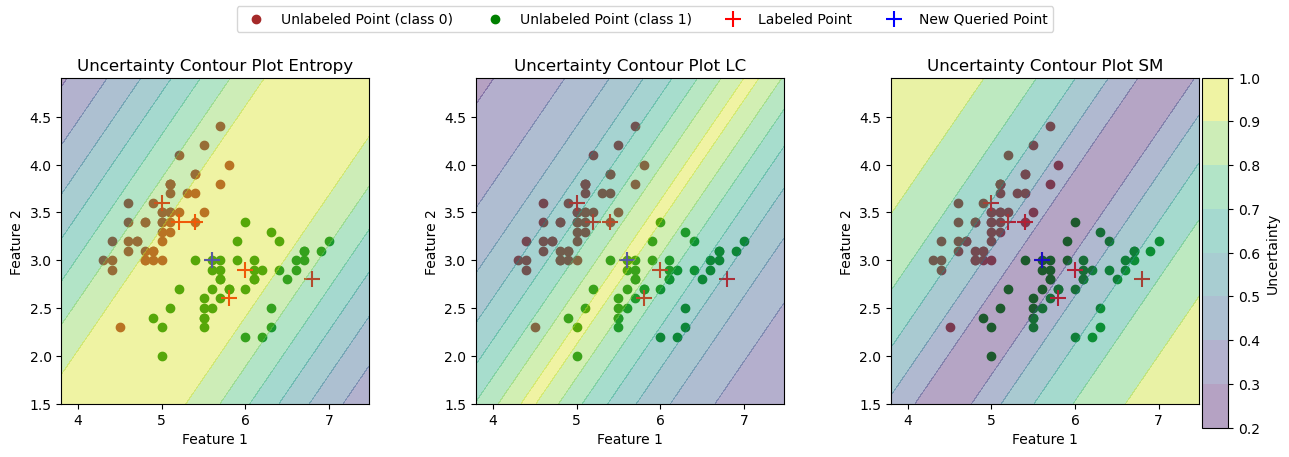

C:\Users\engal\AppData\Local\Temp\ipykernel_25552\1685212231.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=4)  # Adjusted padding value


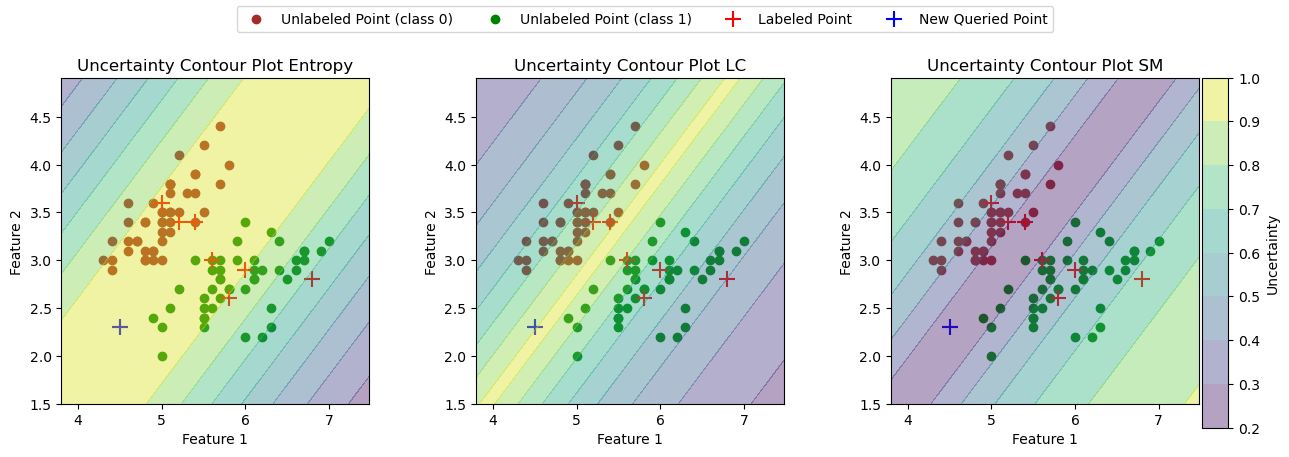

C:\Users\engal\AppData\Local\Temp\ipykernel_25552\1685212231.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=4)  # Adjusted padding value


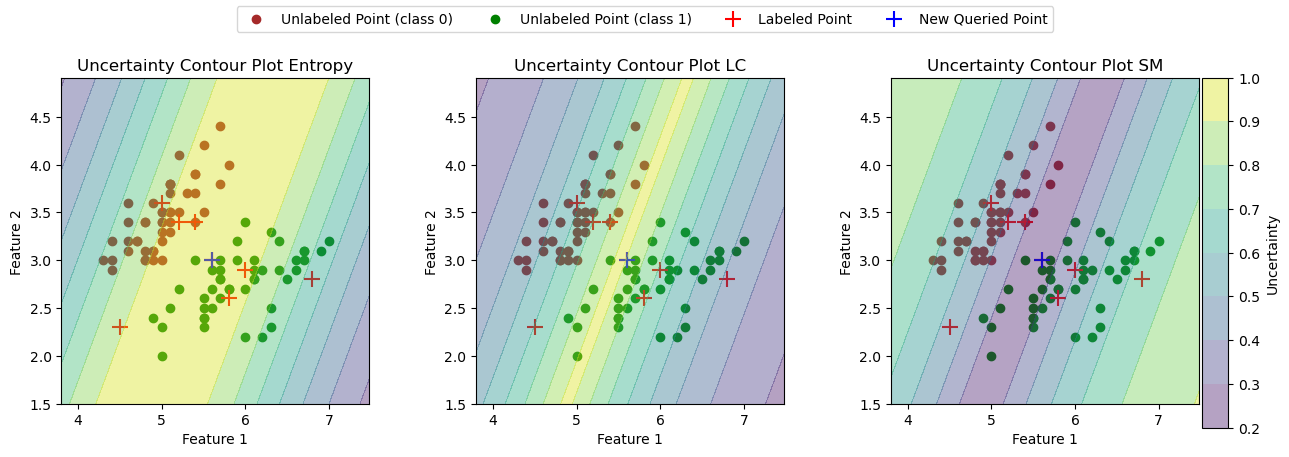

C:\Users\engal\AppData\Local\Temp\ipykernel_25552\1685212231.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=4)  # Adjusted padding value


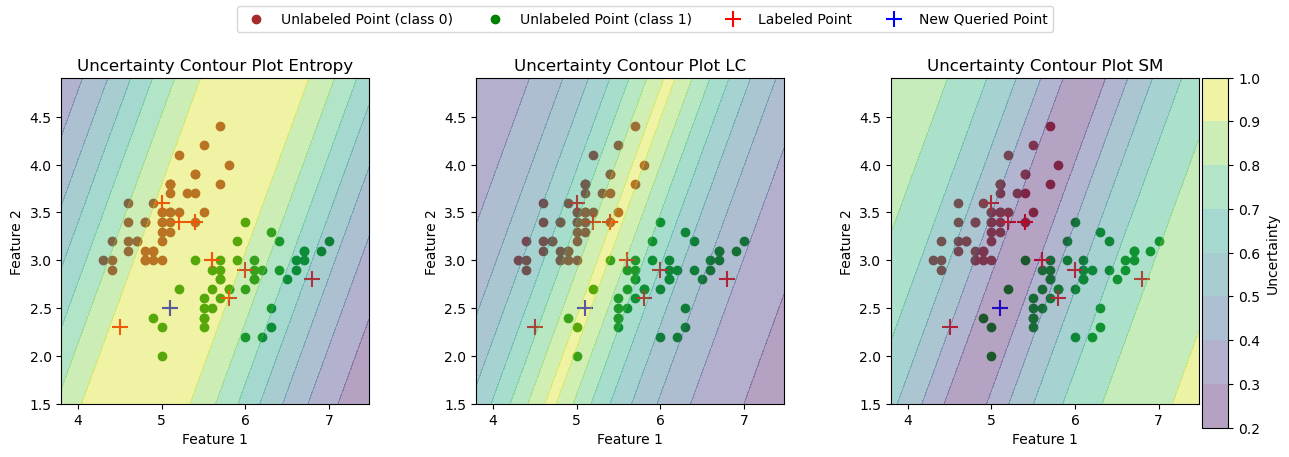

In [6]:
for iteration in range(n_iterations):
    # Train the model on the labeled data
    model_Entropy.fit(X[labeled_indices_Entropy], y[labeled_indices_Entropy])
    model_LC.fit(X[labeled_indices_LC], y[labeled_indices_LC])
    model_SM.fit(X[labeled_indices_SM], y[labeled_indices_SM])    
    # Select uncertain samples from the unlabeled data
    uncertain_indices_Entropy = select_uncertain_samples_Entropy(X[unlabeled_indices_Entropy], model_Entropy, n_samples_per_iteration)
    uncertain_indices_LC = select_uncertain_samples_LC(X[unlabeled_indices_LC], model_LC, n_samples_per_iteration)
    uncertain_indices_SM = select_uncertain_samples_SM(X[unlabeled_indices_SM], model_SM, n_samples_per_iteration)
    
    # Query labels for the uncertain samples
    queried_indices_Entropy = unlabeled_indices_Entropy[uncertain_indices_Entropy]
    queried_indices_LC = unlabeled_indices_LC[uncertain_indices_LC]
    queried_indices_SM = unlabeled_indices_SM[uncertain_indices_SM]
    queried_labels_Entropy = y[queried_indices_Entropy]
    queried_labels_LC = y[queried_indices_LC]
    queried_labels_SM = y[queried_indices_SM]
    
    # Add the queried samples to the labeled set
    labeled_indices_Entropy = np.concatenate((labeled_indices_Entropy, queried_indices_Entropy))
    labeled_indices_LC = np.concatenate((labeled_indices_LC, queried_indices_LC))
    labeled_indices_SM = np.concatenate((labeled_indices_SM, queried_indices_SM))
    
    # Remove the queried samples from the unlabeled set
    unlabeled_indices_Entropy = np.setdiff1d(unlabeled_indices_Entropy, queried_indices_Entropy)
    unlabeled_indices_LC = np.setdiff1d(unlabeled_indices_LC, queried_indices_LC)
    unlabeled_indices_SM = np.setdiff1d(unlabeled_indices_SM, queried_indices_SM)
        
    # plot the uncertainty
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    xy_pairs = np.c_[xx.ravel(), yy.ravel()]

    # Calculate uncertainty for each point within the instance space
    uncertainties_1 = calculate_uncertainty_Entropy(xy_pairs, model_Entropy)
    uncertainties_2 = calculate_uncertainty_LeastConfident(xy_pairs, model_LC)
    uncertainties_3 = calculate_uncertainty_SmallestMargin(xy_pairs, model_SM)
    
    # Reshape uncertainties to match the shape of the meshgrid
    uncertainties_1 = uncertainties_1.reshape(xx.shape)
    uncertainties_2 = uncertainties_2.reshape(xx.shape)
    uncertainties_3 = uncertainties_3.reshape(xx.shape)

    # Create a figure with three subplots
    fig, axs = plt.subplots(1, 3, figsize=(13, 5))

    Temp=y[unlabeled_indices_Entropy]
    # Plot the contour plots of uncertainties
    im1 = axs[0].scatter(X[unlabeled_indices_Entropy[Temp==0], 0], X[unlabeled_indices_Entropy[Temp==0], 1], c='#A52A2A',cmap='viridis', label='Unlabeled Point (class 0)')
    im1 = axs[0].scatter(X[unlabeled_indices_Entropy[Temp==1], 0], X[unlabeled_indices_Entropy[Temp==1], 1], c='green', cmap='viridis', label='Unlabeled Point (class 1)')
    axs[0].scatter(X[labeled_indices_Entropy, 0], X[labeled_indices_Entropy, 1], marker='+', c='red', cmap='viridis', label='Labeled Point', s=120)
    axs[0].scatter(X[queried_indices_Entropy[-1], 0], X[queried_indices_Entropy[-1], 1], marker='+', c='blue', label='New Queried Point', s=120)
    contour1 = axs[0].contourf(xx, yy, uncertainties_1, alpha=0.4, cmap='viridis')
    axs[0].set_xlabel('Feature 1')
    axs[0].set_ylabel('Feature 2')
    axs[0].set_title('Uncertainty Contour Plot Entropy')

    Temp=y[unlabeled_indices_LC]
    im2 = axs[1].scatter(X[unlabeled_indices_LC[Temp==0], 0], X[unlabeled_indices_LC[Temp==0], 1], c='#A52A2A', cmap='viridis')
    im2 = axs[1].scatter(X[unlabeled_indices_LC[Temp==1], 0], X[unlabeled_indices_LC[Temp==1], 1], c='green', cmap='viridis')
    axs[1].scatter(X[labeled_indices_LC, 0], X[labeled_indices_LC, 1], marker='+', c='red', cmap='viridis', s=120)
    axs[1].scatter(X[queried_indices_LC[-1], 0], X[queried_indices_LC[-1], 1], marker='+', c='blue', s=120)
    contour2 = axs[1].contourf(xx, yy, uncertainties_2, alpha=0.4, cmap='viridis')
    axs[1].set_xlabel('Feature 1')
    axs[1].set_ylabel('Feature 2')
    axs[1].set_title('Uncertainty Contour Plot LC')

    Temp=y[unlabeled_indices_SM]
    im3 = axs[2].scatter(X[unlabeled_indices_SM[Temp==0], 0], X[unlabeled_indices_SM[Temp==0], 1], c='#A52A2A')
    im3 = axs[2].scatter(X[unlabeled_indices_SM[Temp==1], 0], X[unlabeled_indices_SM[Temp==1], 1], c='green')
    axs[2].scatter(X[labeled_indices_SM, 0], X[labeled_indices_SM, 1], marker='+', c='red', cmap='viridis', s=120)
    axs[2].scatter(X[queried_indices_SM[-1], 0], X[queried_indices_SM[-1], 1], marker='+', c='blue', s=120)
    contour3 = axs[2].contourf(xx, yy, uncertainties_3, alpha=0.4, cmap='viridis')
    axs[2].set_xlabel('Feature 1')
    axs[2].set_ylabel('Feature 2')
    axs[2].set_title('Uncertainty Contour Plot SM')

    # Create a common colorbar for all subplots
    cbar_ax = fig.add_axes([0.96, 0.15, 0.02, 0.7])  # Position of the colorbar
    fig.colorbar(contour1, cax=cbar_ax, label='Uncertainty')
    # Add a horizontal legend above the subplots
    legend_labels = ['Unlabeled point', 'Labeled Point', 'New Queried Point']
    # Add legend with custom handles
    fig.legend(loc='upper center', ncol=4)
    #fig.legend(['Unlabeled Point', 'Labeled Point', 'New Queried Point'], loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.1))
    plt.tight_layout(pad=4)  # Adjusted padding value
    plt.show()

In [7]:
# Final model training on all labeled data
model_Entropy.fit(X[labeled_indices_Entropy], y[labeled_indices_Entropy])
model_LC.fit(X[labeled_indices_LC], y[labeled_indices_LC])
model_SM.fit(X[labeled_indices_SM], y[labeled_indices_SM])

# Make predictions on test data
test_data = np.array([[4.5, 3.2],
                      [6.2, 2.8],
                      [7.3, 3.0]])
predictions_Entropy = model_Entropy.predict(test_data)
predictions_LC = model_LC.predict(test_data)
predictions_SM = model_SM.predict(test_data)

print("Predictions on test data: Entropy")
for i, prediction in enumerate(predictions_Entropy):
    print(f"Sample {i+1}: Predicted class - {prediction}")

print("Predictions on test data: LC")
for i, prediction in enumerate(predictions_LC):
    print(f"Sample {i+1}: Predicted class - {prediction}")

print("Predictions on test data: SM")
for i, prediction in enumerate(predictions_SM):
    print(f"Sample {i+1}: Predicted class - {prediction}")

Predictions on test data: Entropy
Sample 1: Predicted class - 0
Sample 2: Predicted class - 1
Sample 3: Predicted class - 1
Predictions on test data: LC
Sample 1: Predicted class - 0
Sample 2: Predicted class - 1
Sample 3: Predicted class - 1
Predictions on test data: SM
Sample 1: Predicted class - 0
Sample 2: Predicted class - 1
Sample 3: Predicted class - 1
